# 0. Basic Setup

In [51]:
## common imports
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## to make this notebook's output stable across runs
np.random.seed(42)

In [117]:
## import sklearn packages
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve

In [5]:
## read the data
data = pd.read_csv('insurance_classification_data.csv')

In [12]:
data.shape

(1795672, 89)

In [6]:
data.head()

,uniqueID,Var01,Var03,Var07,Var10,Var11,Var13,Var14,Var19,Var20,...,c05,c16,c26,c34,c35,c38,c39,c40,id,train
0,352373,A,A,0,2.0,B,A,A,C,B,...,28.0,8.0,21.0,20.0,19.0,14.0,17.0,13.0,8747.0,Y
1,352373,A,A,0,2.0,B,A,A,C,B,...,28.0,8.0,21.0,20.0,19.0,14.0,17.0,13.0,8747.0,Y
2,765898,A,A,0,2.0,B,A,A,C,B,...,29.0,21.0,21.0,20.0,19.0,5.0,17.0,13.0,8747.0,Y
3,765898,A,A,0,2.0,B,A,A,C,B,...,29.0,21.0,21.0,20.0,19.0,5.0,17.0,13.0,8747.0,Y
4,138374,B,A,0,2.0,A,E,A,C,B,...,24.0,24.0,21.0,0.0,19.0,30.0,17.0,13.0,40261.0,Y


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795672 entries, 0 to 1795671
Data columns (total 89 columns):
uniqueID    int64
Var01       object
Var03       object
Var07       int64
Var10       float64
Var11       object
Var13       object
Var14       object
Var19       object
Var20       object
Var21       object
Var23       object
Var25       object
Var26       float64
Var27       float64
Var28       float64
Var29       float64
Var30       int64
Var31       int64
Var32       int64
Var33       int64
Var34       int64
Var35       int64
Var42       int64
pred_s      float64
Var47       float64
Var48       object
Var49       object
Var50       int64
Var51       object
Var52       object
Var53       object
Var55       object
c01         object
c02         object
c03         object
c06         object
c07         object
c08         float64
c09         float64
c10         float64
c11         float64
c12         float64
c13         object
c14         object
c15         float64
c17       

In [22]:
# from pprint import pprint
# pprint(list(data))
# list(data)

In [86]:
## training set
data_train = data.loc[data.train=="Y"]
data_train.shape

(1647565, 89)

In [75]:
## test set
data_test = data.loc[data.train=="N"]
data_test.shape

(148107, 89)

# 1. Exploratory Data Analysis

## Tasks:
check for missings, distributions, duplicates, highly correlated 

## Todo: 
1. duplications: Do we need to remove uniqueID,id,Var47... then check duplication? Do we remove the duplications for all following analysis?
2. how to deal with categorical data?
3. correlcation analysis

#### Duplicates

In [121]:
## check training set duplicates
# 1295 duplicated rows 
duplicateRowsDF = data_train[data_train.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape

Duplicate Rows except first occurrence based on all columns are :


(1295, 89)

In [87]:
data_train.drop_duplicates().shape

(1646270, 89)

In [88]:
data_train_nodupli = data_train.drop_duplicates()

#### Missing values 

In [42]:
## check training set missing values
total = data_train.isnull().sum()
percent = data_train.isnull().sum()/data_train.isnull().count()*100
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [127]:
# print(data_train.isnull().sum())

In [49]:
missing.sort_values(by=['Percent'], ascending = False)

,Total,Percent
c04,664123,40.309366
c39,437060,26.527633
c40,432604,26.257173
c38,422082,25.618534
c16,259121,15.727513
c05,252524,15.327104
c18,157811,9.578438
c15,155381,9.430948
c09,154676,9.388158
c10,154676,9.388158


#### Distribution

In [150]:
def cat_distr(var):
    clean_var = data_train[var].fillna('Missing')
    var_counts = clean_var.value_counts()
    barplot = sns.barplot(x=var_counts.index, y=var_counts.values, alpha=1)
    return var_counts, barplot

(A    1478517
 B      72607
 Q      41214
 D      22458
 H      11162
 G      10875
 C       4890
 L       3486
 E       2119
 F        151
 I         42
 Z         18
 P         17
 J          7
 N          2
 Name: Var03, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x11db41278>)

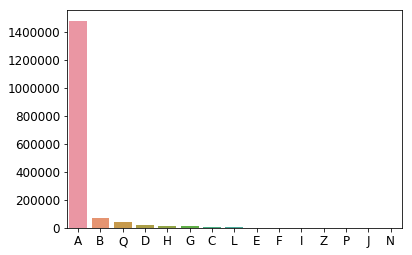

In [151]:
cat_distr('Var03')

(A    1526792
 B      98672
 C      22101
 Name: Var01, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b2495f8>)

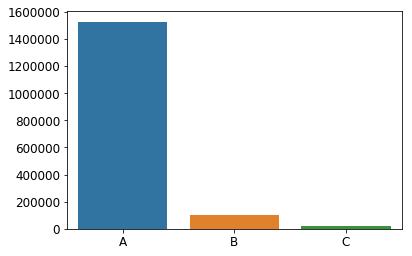

In [152]:
cat_distr('Var01')

(Missing    664123
 37.0       117525
 22.0       117086
 30.0       108554
 14.0       104957
 5.0         92740
 17.0        92526
 10.0        90665
 26.0        81401
 33.0        65693
 2.0         56782
 7.0         30845
 0.0         24668
 Name: c04, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b339cf8>)

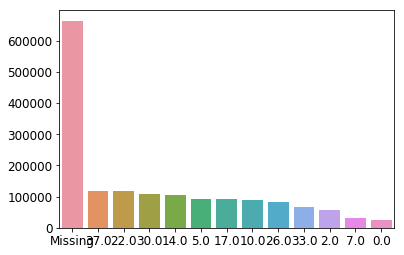

In [153]:
cat_distr('c04')

#### ? Categorical data/ odrinary data relation with classification target 0/1 (Boxplots?)

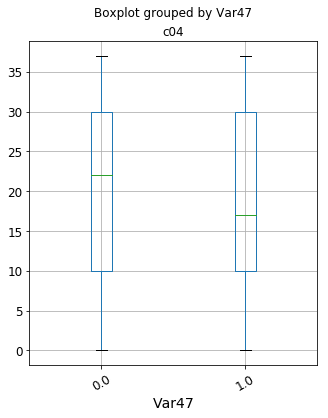

In [122]:
data_train.boxplot('c04','Var47', rot = 30,figsize=(5,6))

#### Current linear model accuracy pred_s
<p>following could change to confusion matrix

In [98]:
Var47_counts = data_train['Var47'].value_counts()
Var47_counts

0.0    836690
1.0    810875
Name: Var47, dtype: int64

In [109]:
TP = len(data_train[(data_train['pred_s']>=50) & (data_train['Var47']==1)]) 

In [110]:
FN = len(data_train[(data_train['pred_s']<50) & (data_train['Var47']==0)]) 

In [113]:
accuracy = (TP+FN)/(data_train.shape[0])
accuracy

0.7108302252111449

# 2. A Simple Classifier

## Questions: 
1. How to deal with categorical data ABCDE?
2. How to deal with discreate numerical data 1 2 3 4 5?

In [123]:
# select all categorical data as cat_train
cat_train = data_train.select_dtypes(include=['object']).copy()

In [125]:
cat_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1647565 entries, 0 to 1795671
Data columns (total 40 columns):
Var01    1647565 non-null object
Var03    1647565 non-null object
Var11    1647565 non-null object
Var13    1647565 non-null object
Var14    1647565 non-null object
Var19    1647565 non-null object
Var20    1647565 non-null object
Var21    1647565 non-null object
Var23    1647565 non-null object
Var25    1647565 non-null object
Var48    1647565 non-null object
Var49    1647565 non-null object
Var51    1647565 non-null object
Var52    1647565 non-null object
Var53    1647565 non-null object
Var55    1647565 non-null object
c01      1647565 non-null object
c02      1647565 non-null object
c03      1647565 non-null object
c06      1647565 non-null object
c07      1647565 non-null object
c13      1647565 non-null object
c14      1647565 non-null object
c17      1647565 non-null object
c20      1647565 non-null object
c21      1647565 non-null object
c22      1647565 non-null obj

#### onehot encoding  
transform train test sets together?

In [139]:
import category_encoders as ce
data_train_ = data_train.copy()
droplist0 = ['Var47', 'pred_s', 'uniqueID', 'id','train']
X0_train = data_train.drop(droplist0, axis=1)
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X0_train_ohe = ohe.fit_transform(X0_train)
X0_train_ohe.head().transpose()

,0,1,2,3,4
Var01_A,1.0,1.0,1.0,1.0,0.0
Var01_B,0.0,0.0,0.0,0.0,1.0
Var01_C,0.0,0.0,0.0,0.0,0.0
Var03_A,1.0,1.0,1.0,1.0,1.0
Var03_B,0.0,0.0,0.0,0.0,0.0
Var03_Q,0.0,0.0,0.0,0.0,0.0
Var03_G,0.0,0.0,0.0,0.0,0.0
Var03_H,0.0,0.0,0.0,0.0,0.0
Var03_C,0.0,0.0,0.0,0.0,0.0
Var03_D,0.0,0.0,0.0,0.0,0.0


In [162]:
X0_train_ohe.iloc[:5, :100]

,Var01_A,Var01_B,Var01_C,Var03_A,Var03_B,Var03_Q,Var03_G,Var03_H,Var03_C,Var03_D,...,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var42,Var48_I
0,1,0,0,1,0,0,0,0,0,0,...,9.0,10.0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,...,9.0,8.0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,9.0,10.0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,...,9.0,8.0,0,0,0,0,0,0,0,1
4,0,1,0,1,0,0,0,0,0,0,...,9.0,8.0,1,1,0,0,0,0,0,0


In [160]:
# X0_train_ohe.to_csv ('insurance_clf_ohe.csv', index = None, header=True)

In [166]:
## select the inputs the output for our classification task

# features1 = ['']
target = ['Var47']
droplist0 = []

X0_train = X0_train_ohe.fillna(0)
y0_train = data_train[target]
# X0_test = data_test.drop(droplist1, axis=1)
# y0_test = data_test[target1]

In [167]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=150, random_state=42, tol=0.05)
sgd_clf.fit(X0_train, y0_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=150,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.05,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [168]:
print(sgd_clf.score(X0_train, y0_train))
print(cross_val_score(sgd_clf, X0_train, y0_train, cv=3, scoring="accuracy"))

# output:
# sgd_clf.score 0.5811103052079888
# cross_val_score [0.71445896 0.69508858 0.63575977]

0.5811103052079888
[0.71445896 0.69508858 0.63575977]


In [24]:
## select the inputs the output for our classification task

# features1 = ['']
# target1 = ['Var47']
# droplist1 = ['Var47', 'pred_s', 'uniqueID', 'id','train']

# X1_train = data_train.drop(droplist1, axis=1)
# y1_train = data_train[target1]
# X2_test = data_test.drop(droplist1, axis=1)
# y2_test = data_test[target1]

# 3. Decision Tree Classifier

In [118]:
# imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import tree

In [119]:
## select the inputs the output for our classification task

# features2 = ['']
target2 = ['Var47']
droplist2 = ['Var47', 'pred_s', 'uniqueID', 'id', 'train']

X2_train = data_train.drop(droplist2, axis=1)
y2_train = data_train[target2]
X2_test = data_test.drop(droplist2, axis=1)
y2_test = data_test[target2]

In [ ]:
rf_clf = RandomForestClassifier(random_state=42, max_depth = 20)
rf_clf.fit(X_train, y_train)

In [ ]:
print("Random Forest Accuracy for Test Set:", accuracy_score(y_test, rf_clf.predict(X_test)))